<a href="https://colab.research.google.com/github/connectedcircles/Network-Visualisation-2024/blob/main/Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linkedin Network Analysis**

In order to get an analytics of exported network from linkedin, followe the instruction [link](https://www.linkedin.com/help/linkedin/answer/a566336/export-connections-from-linkedin). Upload the file and run the code.

In [3]:
!pip install pyjanitor pyvis --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.9 MB/s eta 0:00:00


In [4]:
import pandas as pd
import janitor
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
from pyvis import network as net

In [11]:
#read the connections, skip first two rows
df_ori = pd.read_csv("/content/Connections.csv", skiprows= 3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# preparing dataframe for the visualisation
df = (
    df_ori
    .clean_names() # remove spacing and capitalization
    .drop(columns=['first_name', 'last_name', 'email_address']) # drop for privacy
    .dropna(subset=['company', 'position']) # drop missing values in company and position
    .to_datetime('connected_on', format='%d %b %Y')
  )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.transform_columns` instead.
  return method(self._obj, *args, **kwargs)


Visualising top companies that your connections work for





In [15]:
#set up some numbers for visualisation
number_of_companies = 10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
#removing freelancers
pattern = "freelance|self-employed"
df = df[~df['company'].str.contains(pattern, case=False)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Take 20 top companies that your connections are working for

In [17]:
df_company = df['company'].value_counts().reset_index()
df_company.columns = ['company', 'count']
df_company = df_company.sort_values(by="count", ascending=False)
df_company.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,company,count
0,SWISS KRONO GROUP,100
1,SWISS KRONO Group,58
2,SWISS KRONO AG,48
3,Boston Consulting Group (BCG),20
4,Stora Enso,18
5,Holcim,18
6,Roland Berger,15
7,EY,15
8,SWISS KRONO SAS,15
9,UBS,14


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


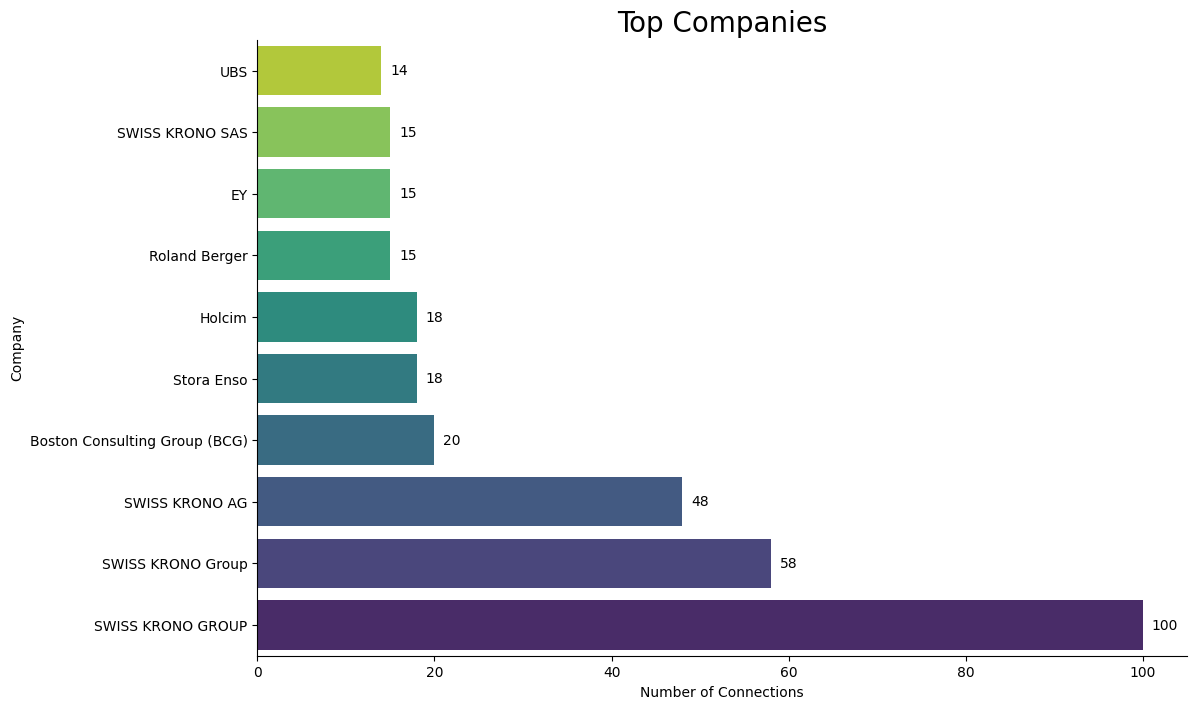

In [18]:

# Create the bar plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='count', y='company', data=df_company.head(number_of_companies), palette='viridis', hue='company', dodge=False)

# Add labels on the bars
for index, value in enumerate(df_company.head(number_of_companies)['count']):
    bar_plot.text(value + 1, index, str(value), color='black', va="center")

# Set the title and labels
plt.title('Top Companies', size= 20)
plt.xlabel('Number of Connections')
plt.ylabel('Company')

# Invert y-axis to have the largest bar at the top
plt.gca().invert_yaxis()

# Remove the top and right spines
sns.despine()

# Show plot
plt.show()

Visualising top postitons that your connections have


In [19]:
#set up some numbers for visualisation
number_of_positions = 10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
df_position = df['position'].value_counts().reset_index()
df_position.columns = ['position', 'count']
df_position = df_position.sort_values(by="count", ascending=False)
df_position.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,position,count
0,CEO,194
1,Chief Executive Officer,170
2,Managing Director,131
3,Partner,108
4,Geschäftsführer,85
5,Managing Partner,69
6,Founder,54
7,Co-Founder,46
8,Director,40
9,Founder & CEO,40


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


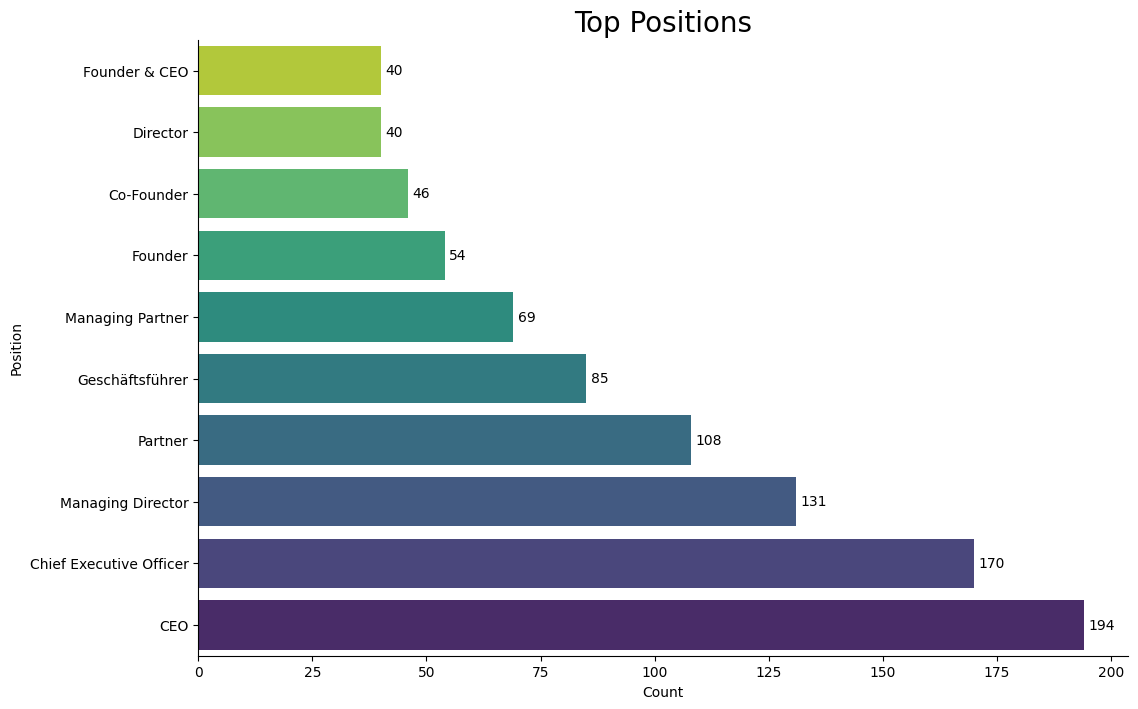

In [21]:
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='count', y='position', data=df_position.head(number_of_positions), palette='viridis', hue='position', dodge=False)

# Add labels on the bars
for index, value in enumerate(df_position.head(number_of_positions)['count']):
    bar_plot.text(value + 1, index, str(value), color='black', va="center")

# Set the title and labels
plt.title('Top Positions', size= 20)
plt.xlabel('Count')
plt.ylabel('Position')

# Invert y-axis to have the largest bar at the top
plt.gca().invert_yaxis()

# Remove the top and right spines
sns.despine()

# Show plot
plt.show()

Create a bar chart of connections, aggregated by the year in which they were connected.

In [24]:
# Ensure the 'connected_on' column is of datetime type
df['connected_on'] = pd.to_datetime(df['connected_on'])

# Create a new column 'year' that extracts the year from 'connected_on'
df['year'] = df['connected_on'].dt.year

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


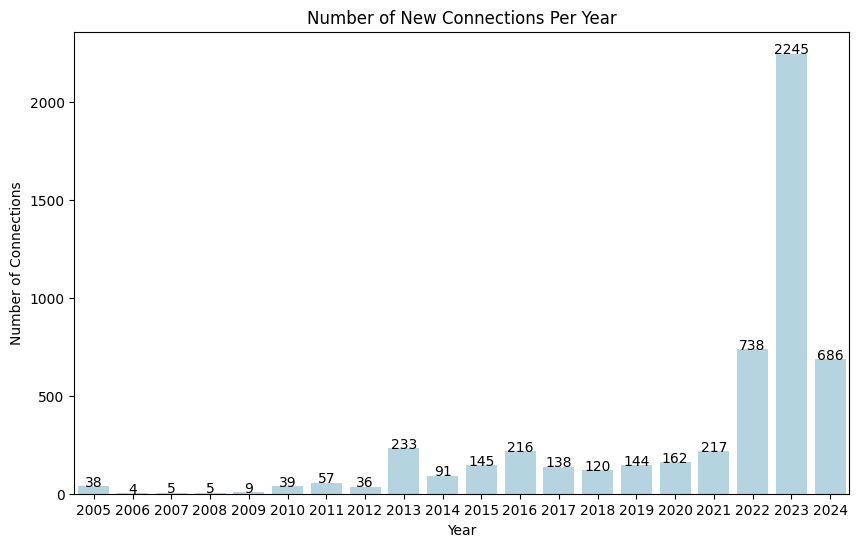

In [25]:
# Create a count of rows for each year
year_counts = df['year'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, color='lightblue')

# Add labels on the bars
for index, value in enumerate(year_counts.values):
    plt.text(index, value + 0.05, str(value), color='black', ha="center")

# Set the title and labels
plt.title('Number of New Connections Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Connections')

# Show plot
plt.show()